In [3]:
from IPython.display import display
import urllib3
import xml.etree.ElementTree as ET
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#TODO Remember to save out your dataframes to a data folder in case things change on website. Do this for the other one too!

In [5]:
def fetchWebpage(dataurl):
    #Get webpage html data
    http = urllib3.PoolManager()
    res = http.request('GET', dataurl)
    rawhtml = res.data.decode('utf-8')
    return rawhtml;

In [6]:
url = "http://amphibiaweb.org/cgi/amphib_ws_locality?orderbyaw=Order&rel-isocc=eq&where-isocc=MG"
dat = fetchWebpage(url)
tree = ET.fromstring(dat)

In [7]:
amphibArray = []
for species in list(tree):
    amphibArray.append({attr.tag: attr.text for attr in species})
xmldf = pd.DataFrame(amphibArray)
xmldf = xmldf.drop_duplicates("scientificname")
sciname = xmldf["scientificname"]
xmldf["genus"] = sciname.apply(lambda x : x.split()[0])
xmldf["species"] = sciname.apply(lambda x : x.split()[1])

In [8]:
iucnrawdata = pd.read_table("amphibdat.txt")
df = pd.merge(xmldf, iucnrawdata, how="left", left_on=["scientificname", "genus", "order", "family", "species"], right_on=["gaa_name", "genus", "order", "family", "species"])
df.to_csv("data/amphibians.csv")
familyct = pd.DataFrame(df["family"].value_counts());
totalct = len(df.index)
orderct = pd.DataFrame(df["order"].value_counts())
genusct = pd.DataFrame(df["genus"].value_counts())
print("Counts of Species Taxanomic Orders:")
display(orderct)
print("Counts of Species Taxanomic Families:")
display(familyct)
print("Counts of Top 5 Species Taxanomic Genuses:")
display(genusct.head())

Counts of Species Taxanomic Orders:


,order
Anura,307


Counts of Species Taxanomic Families:


,family
Mantellidae,210
Microhylidae,86
Hyperoliidae,11


Counts of Top 5 Species Taxanomic Genuses:


,genus
Boophis,77
Gephyromantis,40
Mantidactylus,31
Stumpffia,16
Mantella,16


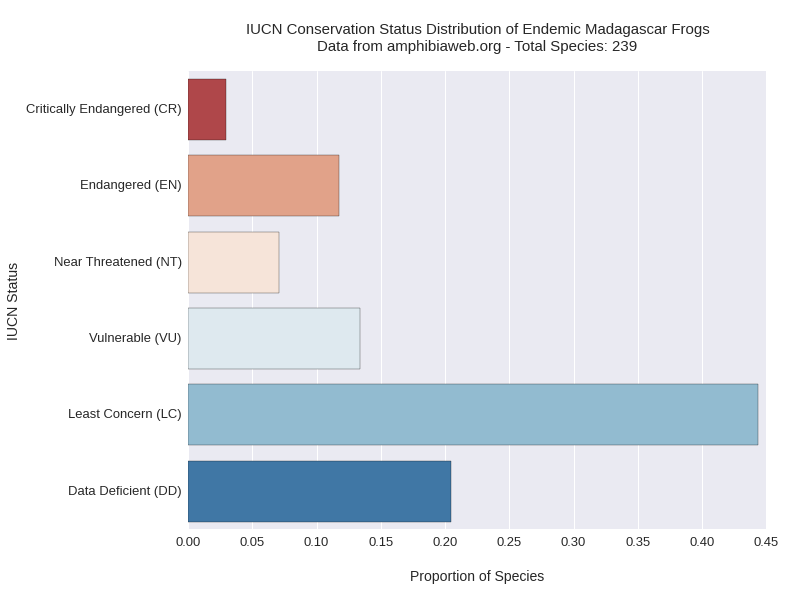

In [9]:
iucnorder = ["Data Deficient (DD)", "Least Concern (LC)", "Vulnerable (VU)", "Near Threatened (NT)", "Endangered (EN)", "Critically Endangered (CR)"]
plotdat = pd.DataFrame(df["iucn"].dropna().value_counts())
iucnct = sum(plotdat["iucn"]);
plt.figure(figsize=(11, 8.5))
sns.barplot(y=plotdat.index, x=plotdat["iucn"]/iucnct, order=reversed(iucnorder), palette="RdBu")
plt.title("\nIUCN Conservation Status Distribution of Endemic Madagascar Frogs\nData from amphibiaweb.org - Total Species: "+str(iucnct)+"\n", fontsize=15)
plt.xlabel("\nProportion of Species\n", fontsize=14)
plt.ylabel("IUCN Status", fontsize=14)
plt.tick_params(labelsize=13)
plt.tight_layout()
plt.savefig("figures/frogIUCN.png")

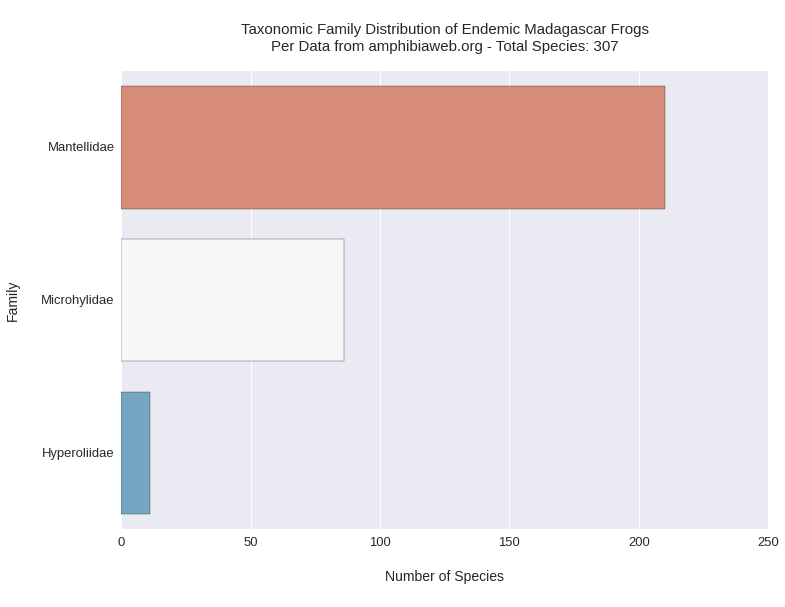

In [10]:
plt.figure(figsize=(11, 8.5))
sns.barplot(y=familyct.index, x=familyct["family"], palette="RdBu")
plt.title("\nTaxonomic Family Distribution of Endemic Madagascar Frogs\nPer Data from amphibiaweb.org - Total Species: "+str(totalct)+"\n", fontsize=15)
plt.xlabel("\nNumber of Species\n", fontsize=14)
plt.ylabel("Family\n", fontsize=14)
plt.tick_params(labelsize=13)
plt.tight_layout()
plt.savefig("figures/frogFamily.png")

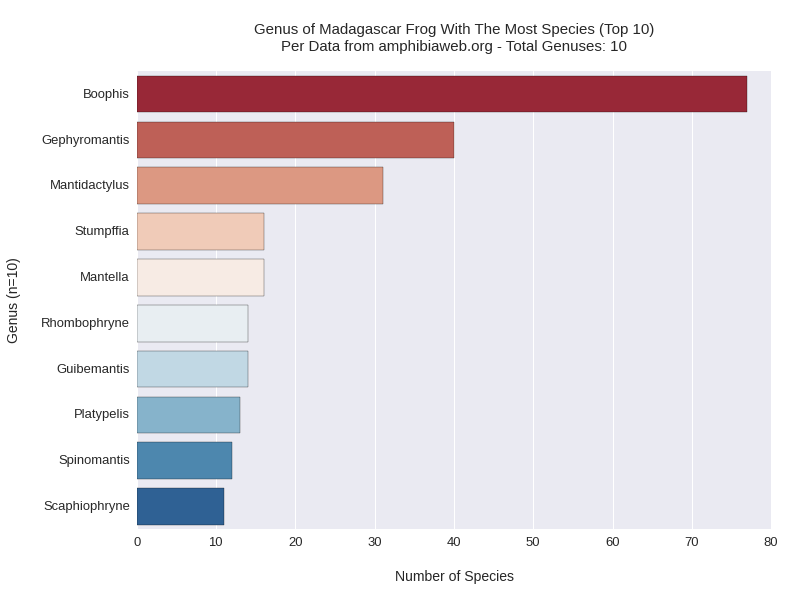

In [16]:
n = 10
genusData = pd.DataFrame(df["genus"].value_counts())
plt.figure(figsize=(11, 8.5))
sns.barplot(y=genusData.index, x=genusData["genus"], palette="RdBu")
plt.title("\nGenus of Madagascar Frog With The Most Species (Top "+str(n)+")\nPer Data from amphibiaweb.org - Total Genuses: "+str(len(genusData["genus"]))+"\n", fontsize=15)
plt.xlabel("\nNumber of Species\n", fontsize=14)
plt.ylabel("Genus (n="+str(len(genusData["genus"]))+")\n", fontsize=14)
plt.tick_params(labelsize=13)
plt.tight_layout()
plt.savefig("figures/frogGenus.png")